In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [22]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

In [23]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7353 - loss: 1.0413 - val_accuracy: 0.9042 - val_loss: 0.3576
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9013 - loss: 0.3570 - val_accuracy: 0.9183 - val_loss: 0.2958
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9140 - loss: 0.3046 - val_accuracy: 0.9275 - val_loss: 0.2646
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9228 - loss: 0.2740 - val_accuracy: 0.9327 - val_loss: 0.2411
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9332 - loss: 0.2421 - val_accuracy: 0.9367 - val_loss: 0.2250
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9364 - loss: 0.2304 - val_accuracy: 0.9412 - val_loss: 0.2083
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9415 - loss: 0.2086 - val_accuracy: 0.9449 - val_loss: 0.1951
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9450 - loss: 0.1957 

In [27]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.1942
Loss = 0.166
Accuracy = 0.951


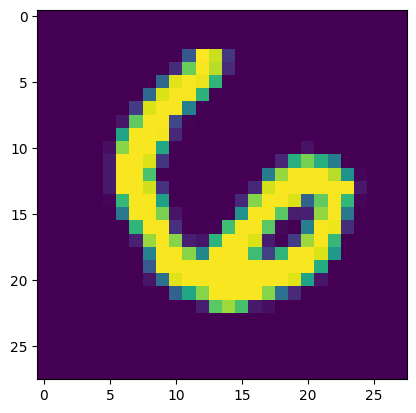

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


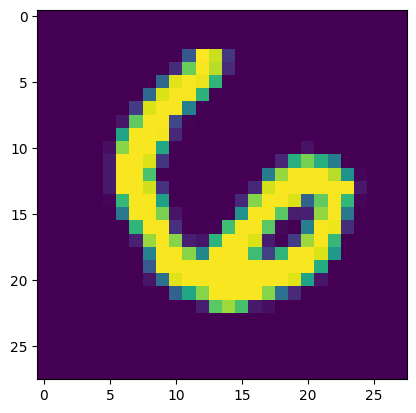

Predicted Value: [4.4095366e-05 5.3047517e-09 2.7433591e-05 3.9564256e-08 6.2398089e-04
 5.2532152e-07 9.9925053e-01 1.7498063e-06 4.5898694e-05 5.9005019e-06]


In [32]:
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print("Predicted Value:",predicted_value[n])

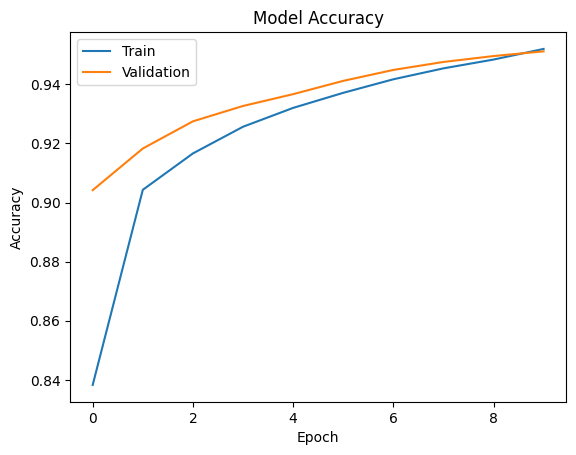

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

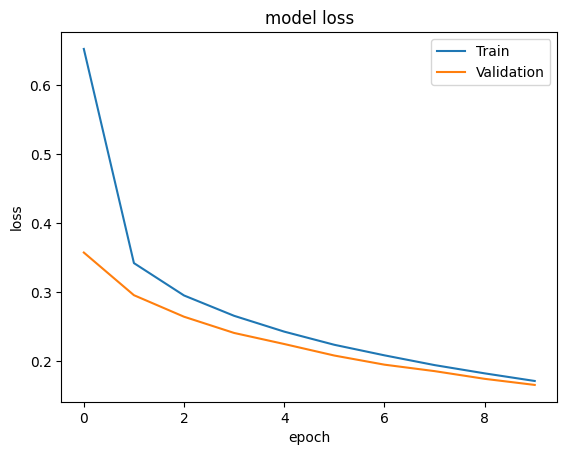

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()